
**П Р О Е К Т**

**анализ успешности компьютерных игр.**

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Есть данные до 2016 года. Планируется кампания на 2017-й. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**ПЛАН РАБОТЫ**

**Предобработка данных**
- Загрузка данных. 
- Предварительный анализ данных. 

**Подготовка данных**

    - Проверка на дубликаты
    - Замена названия столбцов (приведение к нижнему регистру)
    - Преобразование данные в нужные типы.
    - Обработка пропусков
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

**Исследовательский анализ**

 - Посмотреть, сколько игр выпускалось в разные годы. Определить, важны ли данные за все периоды.
 - Посмотреть, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
 - Определить за какой характерный срок появляются новые и исчезают старые платформы.
 - Взять данные за соответствующий актуальный период. 
    - Определить, какие платформы лидируют по продажам, растут или падают. Выберать несколько потенциально прибыльных платформ
    - Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Определить, велика ли разница в продажах.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Выделить жанры с высокими и низкими продажами.

**Составить портрет пользователя каждого региона**

    Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Проверка гипотез**

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. 

**Общий вывод**











# Шаг 1. 
## Подключаем необходимые библиотеки Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Открываем файл с данными
Путь к файлу: /datasets/games.csv.

In [2]:
data=pd.read_csv('/datasets/games.csv') # Открываем исходне данные и начинаем их анализировать

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовка данных
- Проверка на дубликаты
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

PS. В рамках выполнения проекта, сначало была предпринята попытка преобразования данных в нужные типы:
 - data['year_of_release']=data['year_of_release'].astype('int64')
 - data['user_score']=data['user_score'].astype('float64')

Однако, из-за имеющихся в файле нецифровых значений появилась ошибка:
"ValueError: Cannot convert non-finite values (NA or inf) to integer".

Для ее устранения, необходимо сначала сделать рабту с пропусками, а затем изменение типов данных. Поэтому порядок задач был изменен.

## Проверка на дубликаты

In [5]:
data.duplicated().sum()

0

Явных дубликатов не выявлено. 

## Замена названия столбцов (приведение к нижнему регистру)

In [6]:
data.columns=data.columns.str.lower() 

In [7]:
data.columns #проверяем, что получилось 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропусков

### Обработаем пропуски в столбце имя - data['name']

In [8]:
data['name'].isna().sum()

2

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Также рассмотрим пропуски в столбце жанр data['genre']

In [10]:
data['genre'].isna().sum()

2

In [11]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски платформы относятся к данным 1993 года. Пропуски наблюдаются, практически, во всех колонках, поэтому эти строки можно удалить.

In [12]:
data=data.dropna(subset=['name']) # Удаляем записи

In [13]:
data['name'].isna().sum()

0

In [14]:
data['genre'].isna().sum()

0

### Рассмотрим пропуски в столбце data['year_of_release']

In [15]:
data['year_of_release'].isna().sum()

269

In [16]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Удалим данные с пропусками 

In [17]:
data=data.dropna(subset=['year_of_release'])

In [18]:
#data['year_of_release'].fillna(mean_year_of_release, inplace=True)

In [19]:
data['year_of_release'].isna().sum()

0

### Рассмотрим пропуски в столбце оценка критиков data['critic_score'] - пропущено более половины значений

In [20]:
data['critic_score'].isna().sum()

8461

In [21]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Построим сводную таблицу для определения средних для данных рейтинга пользователей в каждом жарне и платформе

In [22]:
critic_score_mean = data.pivot_table(index='platform',columns='genre',values='critic_score') 
critic_score_mean

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,62.982759,67.500000,68.857143,69.100000,72.444444,67.100000,62.000000,72.576923,78.000000,69.300000,62.285714,63.333333
DC,NaN,88.000000,89.000000,NaN,89.000000,NaN,83.000000,88.000000,83.000000,82.000000,97.000000,NaN
DS,58.325926,61.293103,63.133333,63.322581,67.648148,66.640000,58.310345,69.154639,66.531250,62.037037,63.575000,65.000000
GBA,62.176471,65.384615,67.250000,64.518519,67.807692,69.714286,67.547619,75.805556,66.142857,70.555556,69.740000,80.125000
GC,67.917647,64.571429,69.962963,63.565217,63.813559,66.600000,65.652174,72.956522,69.547619,77.200000,77.411111,74.875000
PC,74.248175,71.875000,76.333333,73.000000,74.800000,81.500000,77.444444,80.036145,76.553846,73.378049,80.333333,75.515873
PS,66.875000,55.625000,67.625000,73.833333,76.000000,81.000000,70.300000,79.428571,68.857143,80.500000,73.645161,63.800000
PS2,66.931727,62.348837,70.243590,67.628205,66.375000,72.636364,66.844720,71.563025,66.832117,70.603774,72.478632,69.900000
PS3,69.012766,68.300000,73.298246,72.166667,69.727273,74.000000,71.953846,70.551282,68.983871,62.800000,73.380952,73.375000


In [23]:
critic_score_mean = critic_score_mean.dropna()

In [24]:
critic_score_mean

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,62.982759,67.500000,68.857143,69.100000,72.444444,67.100000,62.000000,72.576923,78.000000,69.300000,62.285714,63.333333
DS,58.325926,61.293103,63.133333,63.322581,67.648148,66.640000,58.310345,69.154639,66.531250,62.037037,63.575000,65.000000
GBA,62.176471,65.384615,67.250000,64.518519,67.807692,69.714286,67.547619,75.805556,66.142857,70.555556,69.740000,80.125000
GC,67.917647,64.571429,69.962963,63.565217,63.813559,66.600000,65.652174,72.956522,69.547619,77.200000,77.411111,74.875000
PC,74.248175,71.875000,76.333333,73.000000,74.800000,81.500000,77.444444,80.036145,76.553846,73.378049,80.333333,75.515873
PS,66.875000,55.625000,67.625000,73.833333,76.000000,81.000000,70.300000,79.428571,68.857143,80.500000,73.645161,63.800000
PS2,66.931727,62.348837,70.243590,67.628205,66.375000,72.636364,66.844720,71.563025,66.832117,70.603774,72.478632,69.900000
PS3,69.012766,68.300000,73.298246,72.166667,69.727273,74.000000,71.953846,70.551282,68.983871,62.800000,73.380952,73.375000
PS4,72.107143,73.428571,72.636364,70.555556,71.727273,88.000000,72.000000,73.375000,75.171429,72.500000,68.365854,69.750000


Построим теловую карту для наглядного представления данных

<AxesSubplot:xlabel='genre', ylabel='platform'>

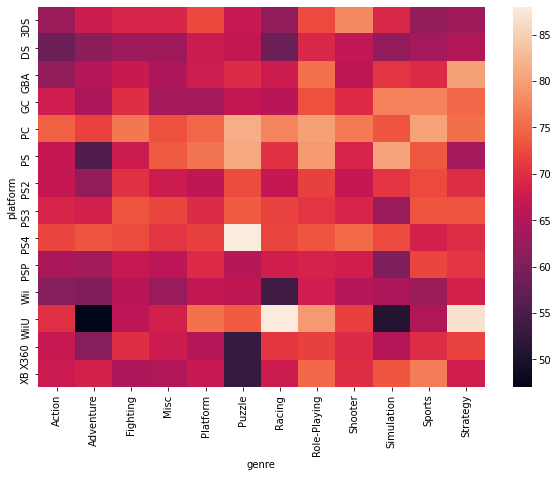

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(critic_score_mean)

Из графика видно, что средние значения рейтинга пользователей для каджой приставки не сильно отличаются по жанрам. Поэтому  можно было бы заполнять пропуски средними значениями относительно жанра игры.
Однако по рекомендации наставника, было принято решение заменить пропуски на -1 и оставить все как есть, чтобы не исказить исходные данные.

In [26]:
data['critic_score'].fillna(-1, inplace=True)

In [27]:
#mean_critic_score = data.groupby('genre')['critic_score'].transform('mean')

In [28]:
#data['critic_score'].fillna(mean_critic_score,inplace=True)

In [29]:
data['critic_score'].isna().sum()

0

### Рассмотрим пропуски в столбце data['user_score'] - пропущено чуть менее половины значений

In [30]:
data['user_score'].isna().sum()

6605

In [31]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
0.2       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [32]:
tbd=data.query('user_score=="tbd"')
tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


In [33]:
tbd_genre = tbd['genre'].value_counts()

<AxesSubplot:>

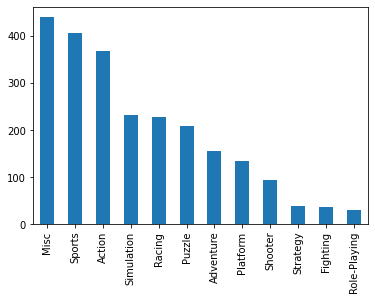

In [34]:
tbd_genre.plot(kind="bar")

tbd (to be determined) - означает, что рейтинг еще не определен. Значение tbd присутствует во всех жанрах. Поэтому заменим их на -1.

In [35]:
data['user_score'] = data['user_score'].replace('tbd', -1) 

In [36]:
data['user_score'] = data['user_score'].fillna(-1) 

In [37]:
data['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
0.2       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Данный код не применялся в финальной версии проекта 

In [38]:
#user_score_null = data[data['user_score']=='NaN']
#user_score_count = user_score_null.pivot_table(index='platform',columns='genre',values='user_score', aggfunc = 'count')
#user_score_count = data.pivot_table(index='platform',columns='genre',values='user_score', aggfunc = 'count') 

In [39]:
data['user_score'].isna().sum()

0

Первоначально планировалось заменить пропуски в столбце data['user_score'] нулями или средними значениями соответствующих выборок. Однако, после консультации с наставником, было принято решение заменить только tbd и пропуски на -1 и оставить все как есть. Я согласился с его логикой в том, что обнуление или замена средним исказят исходные данные, т.к. 0 или среднее - это релевантная оценка, а не tbd или пропуск данных.  

### Рассмотрим пропуски в столбце рейтинг ESRB ['rating'] - пропущено чуть менее половины значений

In [40]:
data['rating'].isna().sum()

6676

In [41]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Не будем производить никаких замен, чтобы не исказить первоначальные данные (по аналогии со столбцом data['user_score']) 

In [42]:
data['rating'].fillna('NaN',inplace=True)

In [43]:
data['rating'].value_counts()

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

## Преобразовывем данные в нужные типы.

Преобразуем типы данных в следующих столбцах:
 - data['year_of_release'] -> изменим тип данных на целые, в том числе для визуализации диаграмм.
 - data['user_score'] -> изменим тип данных на вещественные, чтобы можно было призводить математические операции

In [44]:
data['year_of_release']=data['year_of_release'].astype('int64')
data['user_score']=data['user_score'].astype('float64')

## Cчитаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [45]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
# Создаю столбец с суммарной продажей игры во всех регионах 

In [46]:
data['all_sales'].value_counts()

0.02    1014
0.03     794
0.01     778
0.04     646
0.05     635
        ... 
3.33       1
4.71       1
5.19       1
5.00       1
0.21       1
Name: all_sales, Length: 1004, dtype: int64

In [47]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Вывод по результатам обработки данных:

**Была проведена работа по обогащению и корректировке первоначальных данных**

Данные проверены на дубликаты.

Названия столбцов переведены в нижний регистр.

Проведена работа по заполнению пропусков:

    - столбцы name и genre с пропущенными данными- удалили.    
    - пропуски по годам релиза - удалили записи, т.к их немного. 
    - пропуски по оценке критиков, по пользовательским рейтингам и рейтингам ESRB не заполнялись, чтобы не искажать данные.

Были реобразованы типы данных в следующих столбцах:
 - data['year_of_release'] -> изменим тип данных на целые, в том числе для визуализации диаграмм.
 - data['user_score'] -> изменим тип данных на вещественные, чтобы можно было призводить математические операции

Добавлен столбец с суммарными продажами по всем регионам.
¶

# Шаг 3. Исследовательский анализ данных

## Рассмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

<AxesSubplot:title={'center':'Зависимость появления игр от года'}, xlabel='year_of_release'>

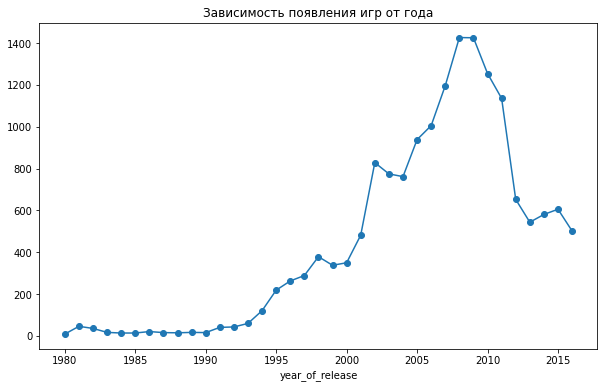

In [49]:
data.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(10,6),title='Зависимость появления игр от года')

Гафик показывает наличие трех основных трендов в индустрии компьютерных игр:
- до 1995 г. новых игр почти не создавалось. Это было, по-видимому, связано со слабым развитием рынка Игровых приставок.
- начиная с  1995 г. до 2009 г. наблюдался резкий рост в отрасли. 
- однако затем произошел сопоставимый спад. В 2016 году количество выпускаемых игр зафиксировано на уровне 2001 года.

Из этого можно сделать вывод о том, что данные за 1985-1995 г не важны. 

## Рассмотрим, как менялись продажи по платформам.

In [50]:
sales_platform=data.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')

In [51]:
sales_platform['all_sales'] = sales_platform['na_sales']+sales_platform['eu_sales']+sales_platform['jp_sales']+sales_platform['other_sales']
sales_platform = sales_platform.sort_values(by='all_sales', ascending=False)
sales_platform.head(10)
#иначе не строился график

,eu_sales,jp_sales,na_sales,other_sales,all_sales
platform,,,,,
PS2,332.63,137.54,572.92,190.47,1233.56
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.02,380.31,59.04,802.78
PS,212.39,139.78,334.72,40.69,727.58
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.59,46.56,184.12,7.61,312.88
PSP,65.62,75.88,107.27,40.76,289.53


<AxesSubplot:title={'center':'Выручка каждой платформы'}, xlabel='platform'>

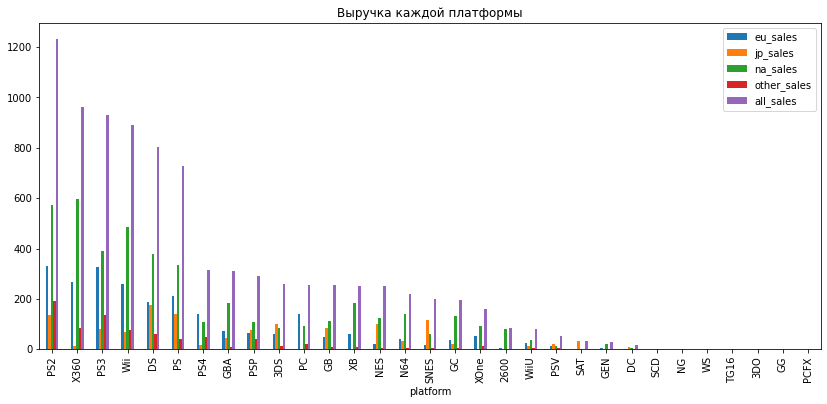

In [52]:
sales_platform.plot(kind='bar',figsize=(14,6), title='Выручка каждой платформы')

Самые большие продажи  у платформ PS2, X360 и PS3.

## За какой характерный срок появляются новые и исчезают старые платформы

In [53]:
sales_plat_year=data.pivot_table(index="platform",columns='year_of_release',values='all_sales',aggfunc='sum')#сводная таблица платформ по годам. 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

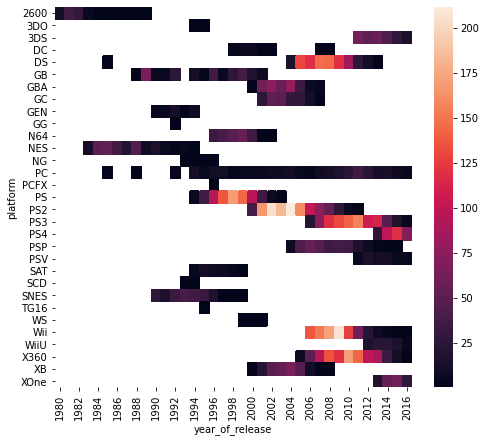

In [54]:
plt.figure(figsize=(8,7))
sns.heatmap(sales_plat_year)

Построена тепловая карта продаж всех приставок по годам. На графике хорошо видно платформы одного производителя, а также их ротацию. Например Sony с платформами: ps, ps2, ps3, ps4. 

### Определим, какие платформы лидируют по продажам, растут или падают. 

In [55]:
list_top_platform=['PS2','X360','PS3','Wii','DS','PS'] # Список top платформ 

In [56]:
top_platform = sales_plat_year.query('platform in @list_top_platform')

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

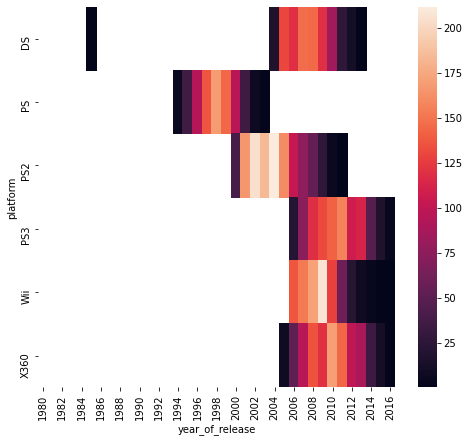

In [57]:
plt.figure(figsize=(8,7))
sns.heatmap(top_platform)

Из графика видно, что платформа в среднем живет 8-10 лет. Пик продаж приходит в среднем через 4-6 лет, т.е. в самой середине срока жизни. Компания PS начинает релиз новой платформы примерно в это время, когда начинается спад у предыдущей версии.

### Анализ игр на 2017 год

In [58]:
actual_data=data.query('year_of_release>=2014') #Для оценки 2017 года берем выборку с 2014 года

<AxesSubplot:title={'center':'Продажи по платформам с 2016 года'}, xlabel='platform'>

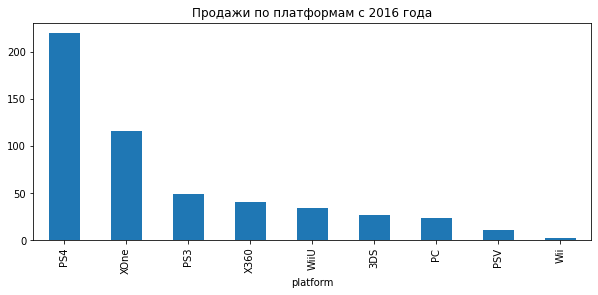

In [109]:
actual_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar",title='Продажи по платформам с 2016 года')

In [60]:
list_act_platform=['3DS','PS3','PS4','X360','XOne'] # Список активных платформ

In [61]:
top_act_platform=sales_plat_year.query('platform in @list_act_platform') # срез по акривным платформам
#top_act_platform

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

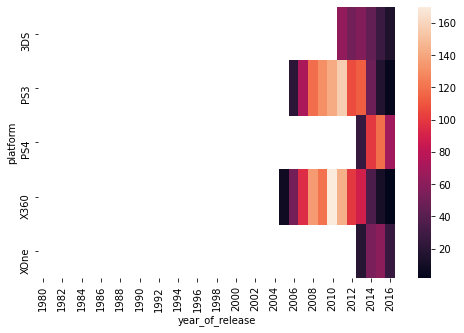

In [62]:
plt.figure(figsize=(8,5))
sns.heatmap(top_act_platform)

Актуальной платформой можно назвать PS4. Она только недавно вышла на рынок. Сейчас, спустя десятилетие, можно уже говорить, что это однин из самых успешных проектов, который работает до сих пор.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [63]:
actual_data=data.query('platform in @list_act_platform and year_of_release>=2014')
#Дата сет с активными платформами и актуальным периодом

In [64]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.98


In [65]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 31 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1146 non-null   object 
 1   platform         1146 non-null   object 
 2   year_of_release  1146 non-null   int64  
 3   genre            1146 non-null   object 
 4   na_sales         1146 non-null   float64
 5   eu_sales         1146 non-null   float64
 6   jp_sales         1146 non-null   float64
 7   other_sales      1146 non-null   float64
 8   critic_score     1146 non-null   float64
 9   user_score       1146 non-null   float64
 10  rating           1146 non-null   object 
 11  all_sales        1146 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 116.4+ KB


<AxesSubplot:xlabel='platform', ylabel='all_sales'>

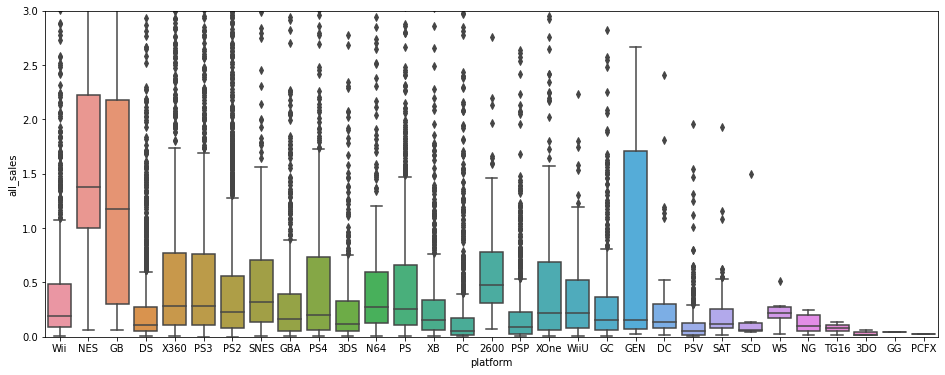

In [66]:
plt.figure(figsize=(16,6))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales', data=data)

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

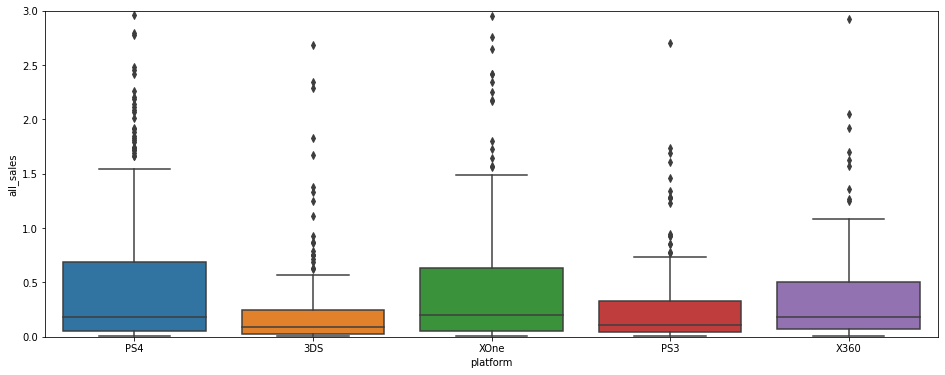

In [67]:
plt.figure(figsize=(16,6))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales', data=actual_data)

Анализируя графики можно увидеть, что медиана продаж у платформ PS4 и Xone почти одинакова. При этом, медианы всех платформ сильно отличаются от средних в меньшую сторону.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. 

<AxesSubplot:title={'center':'Зависимости продаж платформы  PS3 от отзывов пользователей'}, xlabel='user_score', ylabel='all_sales'>

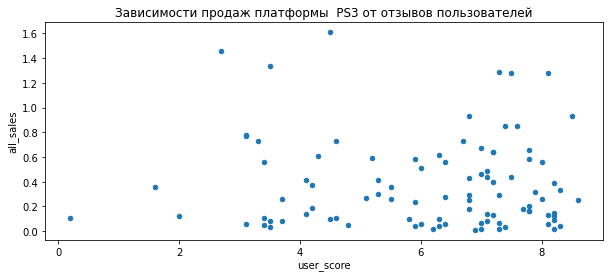

In [68]:
actual_data.query('platform=="PS3" and all_sales<=1.7 and user_score >= 0').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4),   title='Зависимости продаж платформы  PS3 от отзывов пользователей')

<AxesSubplot:title={'center':'Зависимость продаж платформы  PS3 от отзывов критиков'}, xlabel='critic_score', ylabel='all_sales'>

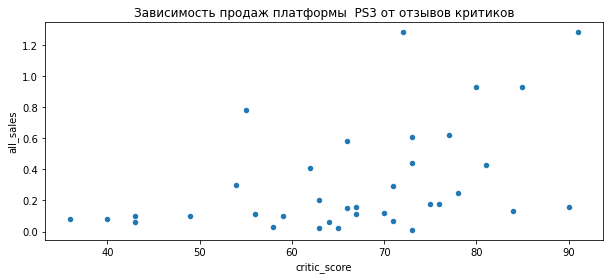

In [69]:
actual_data.query('platform=="PS3" and all_sales<=1.7 and critic_score>=0').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4), title='Зависимость продаж платформы  PS3 от отзывов критиков')

In [70]:
actual_data['all_sales'].corr(actual_data['user_score'])

0.12948449561848802

In [71]:
actual_data['all_sales'].corr(actual_data['critic_score'])

0.20815301341843223

Из графиков видно, что есть положительная зависимость между оценкой критиков и пользователей, но не такая большая.

По данным корреляции можно сделать вывод, что зависимость между продажами и отзывами критиков есть, но ниже средней. Корреляция положительная. Чем лучше отзыв критика, тем выше продажи. 
Отзывы пользователей не так сильно вляют на продажи. Корреляция слабая.

### Соотнесите выводы с продажами игр на других платформах.

In [72]:
list_dr_platform=['3DS','PS2','PS4','X360','XOne'] # Список других платформ, с которыми будем сравнивать

In [73]:
actual_data=data.query('platform in @list_dr_platform and year_of_release>=2014')

<AxesSubplot:title={'center':'Зависимости продаж платформ от отзывов пользователей'}, xlabel='user_score', ylabel='all_sales'>

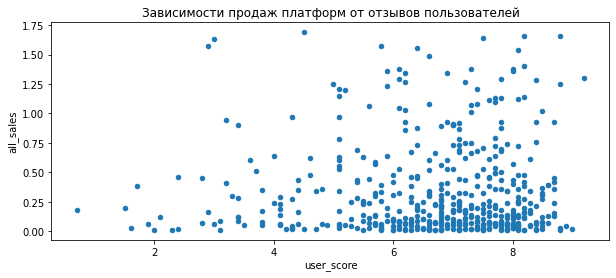

In [74]:
sales_user = actual_data.query('all_sales<=1.7 and user_score >= 0')
sales_user.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4), title='Зависимости продаж платформ от отзывов пользователей')

In [75]:
sales_user['all_sales'].corr(sales_user['user_score'])

0.02360313488776539

<AxesSubplot:title={'center':'Зависимость продаж платформ от отзывов критиков'}, xlabel='critic_score', ylabel='all_sales'>

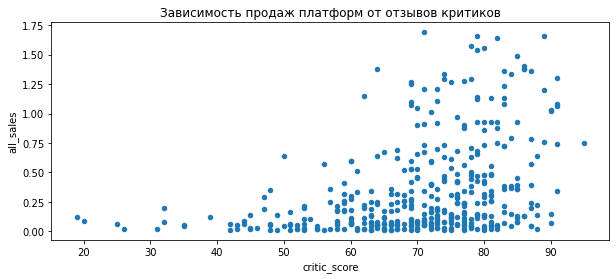

In [76]:
sales_critic = actual_data.query('all_sales<=1.7 and critic_score>=0')
sales_critic.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4), title='Зависимость продаж платформ от отзывов критиков')

In [77]:
sales_critic['all_sales'].corr(sales_critic['critic_score'])

0.3775179421516911

Очень схожая ситуация с платформой PS3. Зависимость между продажами и отзывами критиков положительная и относительно сильная. 
Отзывы пользователей практически не вляют на продажи, корреляция близка к нулю.

## Распределение игр по жанрам

In [78]:
actual_data=data.query('year_of_release>=2014') 

In [79]:
count_genre=actual_data.groupby('genre')['all_sales'].count().sort_values(ascending=False)

<AxesSubplot:title={'center':'Количество продаж по жанрам'}, xlabel='genre'>

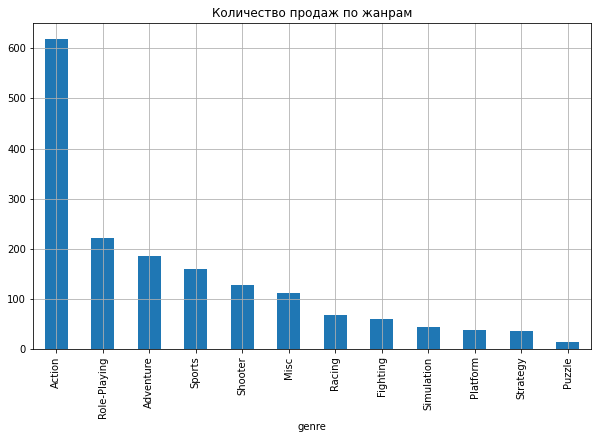

In [80]:
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Количество продаж по жанрам')

По количеству, больше всего покупают игры в жанре Action и Sport, а меньше всего игры в жанре puzzle, strategy.

In [81]:
median_sale_genre=actual_data.groupby('genre')['all_sales'].median().sort_values(ascending=False)
median_sale_genre

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: all_sales, dtype: float64

<AxesSubplot:title={'center':'Медианные продажи по жанрам'}, xlabel='genre'>

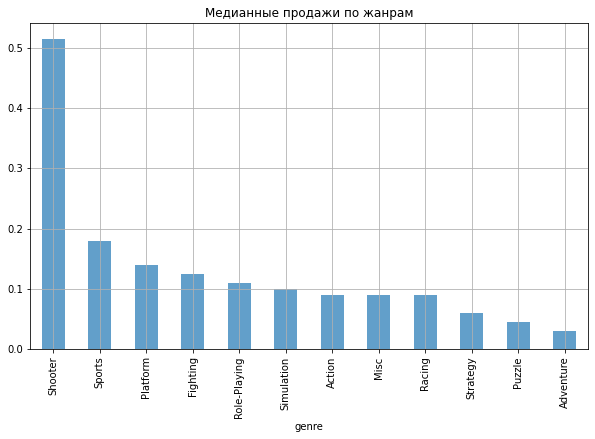

In [82]:
median_sale_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.7,title='Медианные продажи по жанрам')

По выручке от продаж, самым высоким является сегмент shooter и sport. Меньше всего выручки у жанра Adventure.

# Шаг 4. Портрет пользователя каждого региона

## Самые популярные платформы (топ-5).

In [83]:
na_sales_platform = actual_data.pivot_table(index='platform',values=['na_sales','all_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform

,all_sales,na_sales
platform,,
PS4,288.15,98.61
XOne,140.36,81.27
X360,48.22,28.30
3DS,86.68,22.64
PS3,68.18,22.05


Самая популярная платформа в Северной Америке- PS4, затем XOne.

In [84]:
eu_sales_platform = actual_data.pivot_table(index='platform',values=['eu_sales','all_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform

,all_sales,eu_sales
platform,,
PS4,288.15,130.04
XOne,140.36,46.25
PS3,68.18,25.54
PC,27.05,17.97
3DS,86.68,16.12


Самая популярная платформа в Европе тоже PS4, затем XOne.

In [85]:
jp_sales_platform = actual_data.pivot_table(index='platform',values=['jp_sales','all_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform

,all_sales,jp_sales
platform,,
3DS,86.68,44.24
PS4,288.15,15.02
PSV,22.40,14.54
PS3,68.18,11.22
WiiU,42.98,7.31


Самая популярная платформа в Японии 3DS, затем PS4.

## Самые популярные жанры (топ-5).

In [86]:
na_sales_genre = actual_data.pivot_table(index='genre',values=['na_sales','all_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,all_sales,na_sales
genre,,
Shooter,170.94,79.02
Action,199.36,72.53
Sports,109.48,46.13
Role-Playing,101.44,33.47
Misc,37.55,15.05


Самый популярный жанр в Северной Америке - это Shooter, затем идут Action и Sport.

In [87]:
eu_sales_genre = actual_data.pivot_table(index='genre',values=['eu_sales','all_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,all_sales,eu_sales
genre,,
Action,199.36,74.68
Shooter,170.94,65.52
Sports,109.48,45.73
Role-Playing,101.44,28.17
Racing,27.52,14.13


В Европе самые популярные жанры такие же, как и в Северной Америке.

In [88]:
jp_sales_genre = actual_data.pivot_table(index='genre',values=['jp_sales','all_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,all_sales,jp_sales
genre,,
Role-Playing,101.44,31.16
Action,199.36,29.58
Fighting,28.22,6.37
Misc,37.55,5.61
Shooter,170.94,4.87


В Японии ситуация другая. На первом месте Role-Playing. Потом Action и Fighting.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [89]:
na_sales_ESRB=actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
M,96.42
NaN,64.72
E,50.74
T,38.95
E10+,33.23


In [90]:
eu_sales_ESRB=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
M,93.44
NaN,58.95
E,58.06
T,34.07
E10+,26.16


In [91]:
jp_sales_ESRB=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
NaN,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Самые популярные возрастные ограничения в Америке и  Европе- M, без рейтинга и E, в Японии - без рейтинга и T. Из этого можно сделать вывод, что возрастное ограничение влияет на продажи, особенно в Америке и  Европе.

# Шаг 5. Проверка гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.
Альтернативная гипотеза: cредний пользовательский рейтинг платформы XOne и PC не равны.

In [92]:
actual_data=data.query('year_of_release>=2014 and user_score>=0') 

In [93]:
XOne_data = actual_data.query('platform=="XOne"')
XOne_data = XOne_data['user_score'] 

In [94]:
XOne_data.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [95]:
PC_data = actual_data.query('platform=="PC"')
PC_data = PC_data['user_score'] 

In [96]:
PC_data.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Проверим статистическую гипотизу.

 - Н0: cредний пользовательский рейтинг платформы XOne и PC равны.
 - H1: средние рейтинги по платформы разные
Статистическая значимость alpha=5%

In [97]:
alpha=0.05

In [98]:
result1 = st.ttest_ind(XOne_data, PC_data) 

In [99]:
print('Значение p-value:', result1.pvalue)

Значение p-value: 0.10450507919348415


In [100]:
if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута. Средние значения двух генеральных выборок пользовательских рейтингов платформы XOne и PC равны.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [101]:
action_data = actual_data.query('genre=="Action"')
action_data = action_data['user_score'] 

In [102]:
action_data.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [103]:
sport_data = actual_data.query('genre=="Sports"')
sport_data = sport_data['user_score']

In [104]:
sport_data.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

**Проверяем статистическую гипотизу**

 - H0: средние рейтинги по жанрам одинаковые
 - H1: средние рейтинги по жанрам разные
 - Статистическая значимость alpha=5%

In [105]:
alpha=0.05 

In [106]:
results2 = st.ttest_ind(action_data, sport_data)

In [107]:
print('Значение p-value:', results2.pvalue)

Значение p-value: 2.8711147985105864e-19


In [108]:
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Вывод:

 В первом случае:
    Результат говорит о том, что нулевая гипотеза не отвергается.
    p-значение: 0.10450507919348415

 Во второй гипотезе:
    Результат говорит о том, что нулевая гипотеза о равенстве средних отвергается.
    p-значение:  2.8711147985105864e-19

 Значение статистической значимости в обоих случаях- 5%. 

# Шаг 6. Общий вывод

**Результат обработки данных**

 - Была проведена работа по обогащению и корректировке первоначальных данных.
 - Данные проверены на дубликаты.
 - Названия столбцов переведены в нижний регистр.
 - Проведена работа по заполнению пропусков:
    - столбцы name и genre с пропущенными данными- удалили.    
    - пропуски по годам релиза - удалили записи, т.к их немного. 
    - пропуски по оценке критиков, по пользовательским рейтингам и рейтингам ESRB не заполнялись, чтобы не искажать данные.
 - Были реобразованы типы данных в следующих столбцах:
    - data['year_of_release'] -> изменим тип данных на целые, в том числе для визуализации диаграмм.
    - data['user_score'] -> изменим тип данных на вещественные, чтобы можно было призводить математические операции
 - Добавлен столбец с суммарными продажами по всем регионам.

**Исследовательский анализ данных**

Основные выводы:

 - Платформа в среднем живет 8-10 лет. Пик продаж приходит в среднем через 4-6 лет, т.е. в самой середине срока жизни. Компания PS начинает релиз новой платформы примерно в это время, когда начинается спад у предыдущей версии.

 - Актуальной платформой можно назвать PS4. Она только недавно вышла на рынок. Сейчас можно уже говорить, что это однин из мамых успешных проектов, который работает до сих пор.

 - По количеству, больше всего покупают игры в жанре Action, а меньше всего игры в жанре puzzle, strategy.
 - По выручке от продаж, самым высоким является сегмент shooter и sport. Меньше всего выручки у жанра Adventure.

 - Самыми популярными платформами в Северной Америке И Европе являются - PS4, затем XOne, в Японии - 3DS.
 - Самые популярные жанры игр в Америке и Еврове совпадают - это Action, Shooter и Sport.

**Проверка статистичесих гипотез**

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждено;
 - Средние пользовательские рейтинги жанров Action и Sports разные - подтверждено.

¶